# Diagnostic of models

In [52]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
housing = pd.DataFrame.from_csv('../data/housing.csv')
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


In [3]:
# Build model
model = smf.ols(formula='MEDV~LSTAT', data=housing).fit()

# Here are estimated intercept and slope by least square estimation 
b0_ols = model.params[0]
b1_ols = model.params[1]

# Make predictions
housing['BestResponse'] = b0_ols + b1_ols * housing['LSTAT']

# Assumptions behind linear regression model
1. Linearity 
2. independence
3. Normality
4. Equal Variance

## Linearity

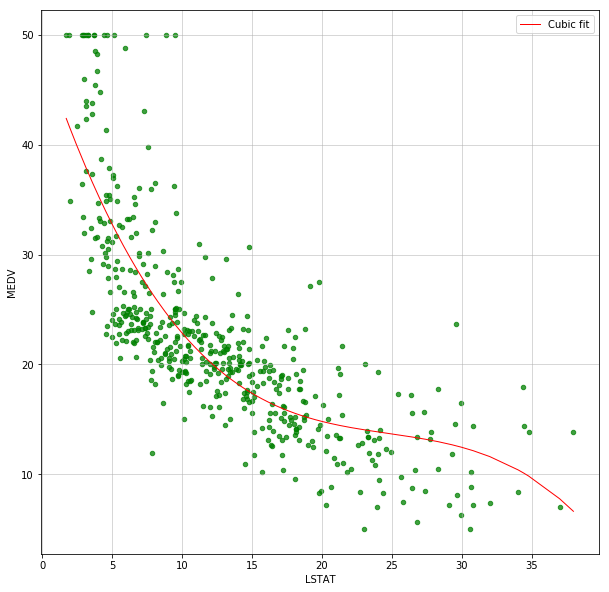

In [64]:
# you can check the scatter plot to have a fast check
poly = np.poly1d(np.polyfit(housing['LSTAT'], housing['MEDV'], deg=3))
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(10, 10), color='green', alpha=0.75)
plt.plot(housing['LSTAT'].sort_values(), poly(housing['LSTAT'].sort_values()), color='red', lw=1, label='Cubic fit')
plt.legend()
plt.grid(lw=0.5);

#### The relation between `LSTAT` and `MEDV` is not really linear.

# Independence

In [5]:
# Get all errors (residuals)
housing['error'] = housing['MEDV'] - housing['BestResponse']

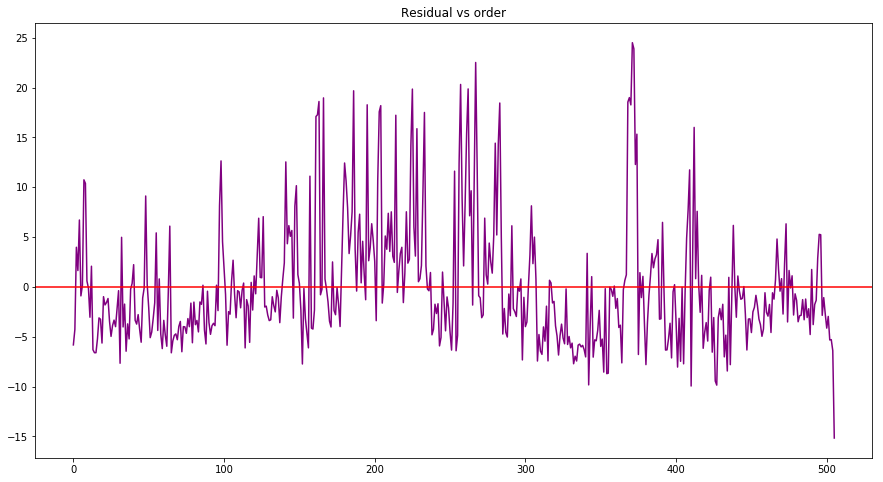

In [6]:
# Method 1: Residual vs order plot
# error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(15, 8))
plt.title('Residual vs order')
plt.plot(housing.index, housing['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

In [7]:
# Method 2: Durbin Watson Test
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 15 Sep 2019   Prob (F-statistic):           5.08e-88
Time:                        07:26:39   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Both the residual plot and the Durbin-Watson statistic suggest that there is some positive correlation in residuals.

# Normality

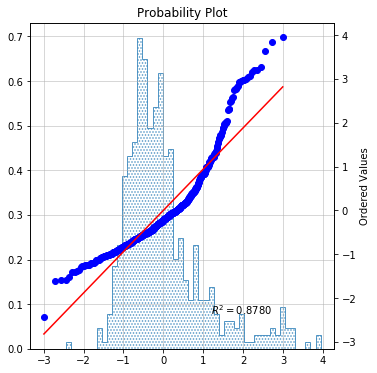

In [73]:
import scipy.stats as stats
z = (housing['error'] - housing['error'].mean()) / housing['error'].std(ddof=1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(z, bins=50, normed=True, histtype='step', hatch='.'*4, alpha=0.75)
#plt.title('Distribution of error (residuals)')
plt.grid(lw=0.5)
plt.subplot(1, 2, 1)
stats.probplot(z, dist='norm', rvalue=True, plot=plt.twinx());
#plt.title('Normal Q-Q plot')
#plt.grid(lw=0.5);

#### Both the distribution plot and the Q-Q plot confirm that the residuals are not normal and right-skewed.

# Equal variance

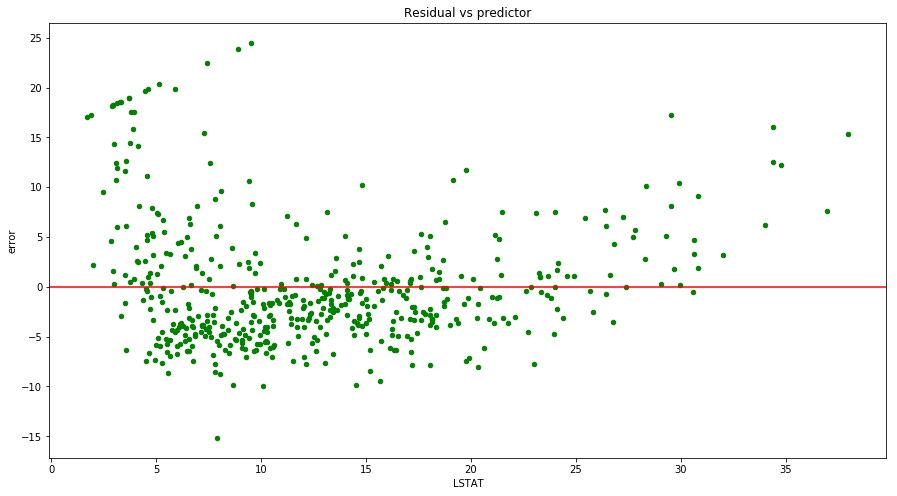

In [50]:
# Residual vs predictor plot
housing.plot(kind='scatter', x='LSTAT', y='error', figsize=(15, 8), color='green')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='red')
plt.show()

#### For different values of `LSTAT` error's variance is also different, which is not good.

## We can see that the regression model (MEDV~LSTAT) violates all four assumptions. Therefore, we cannot make statistical inference using this model.